In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
hosp= pd.read_csv('Hospitalisation details.csv')
medical= pd.read_csv('Medical Examinations.csv')
names= pd.read_excel('Names.xlsx')

In [3]:
hosp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer ID    2343 non-null   object 
 1   year           2343 non-null   object 
 2   month          2343 non-null   object 
 3   date           2343 non-null   int64  
 4   children       2343 non-null   int64  
 5   charges        2343 non-null   float64
 6   Hospital tier  2343 non-null   object 
 7   City tier      2343 non-null   object 
 8   State ID       2343 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 164.9+ KB


In [4]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2335 non-null   object 
 1   BMI                     2335 non-null   float64
 2   HBA1C                   2335 non-null   float64
 3   Heart Issues            2335 non-null   object 
 4   Any Transplants         2335 non-null   object 
 5   Cancer history          2335 non-null   object 
 6   NumberOfMajorSurgeries  2335 non-null   object 
 7   smoker                  2335 non-null   object 
dtypes: float64(2), object(6)
memory usage: 146.1+ KB


In [5]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  2335 non-null   object
 1   name         2335 non-null   object
dtypes: object(2)
memory usage: 36.6+ KB


### 1. Collate the files so that all the information is in one place

In [7]:
firmerge= pd.merge(hosp,medical, on='Customer ID')
data= pd.merge(firmerge,names, on='Customer ID')

In [8]:
data

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,17.580,4.51,No,No,No,1,No,"German, Mr. Aaron K"
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,17.600,4.39,No,No,No,1,No,"Rosendahl, Mr. Evan P"
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,16.470,6.35,No,No,Yes,1,No,"Albano, Ms. Julie"
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,17.700,6.28,No,No,No,1,No,"Riveros Gonzalez, Mr. Juan D. Sr."
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,22.340,5.57,No,No,No,1,No,"Brietzke, Mr. Jordan"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,Id5,1989,Jun,19,0,55135.40,tier - 1,tier - 2,R1012,35.530,5.45,No,No,No,No major surgery,yes,"Kadala, Ms. Kristyn"
2331,Id4,1991,Jun,6,1,58571.07,tier - 1,tier - 3,R1024,38.095,6.05,No,No,No,No major surgery,yes,"Osborne, Ms. Kelsey"
2332,Id3,1970,?,11,3,60021.40,tier - 1,tier - 1,R1012,34.485,11.87,yes,No,No,2,yes,"Lu, Mr. Phil"
2333,Id2,1977,Jun,8,0,62592.87,tier - 2,tier - 3,R1013,30.360,5.77,No,No,No,No major surgery,yes,"Lehner, Mr. Matthew D"


In [9]:
data.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,17.58,4.51,No,No,No,1,No,"German, Mr. Aaron K"
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,17.60,4.39,No,No,No,1,No,"Rosendahl, Mr. Evan P"
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,16.47,6.35,No,No,Yes,1,No,"Albano, Ms. Julie"
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,17.70,6.28,No,No,No,1,No,"Riveros Gonzalez, Mr. Juan D. Sr."
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,22.34,5.57,No,No,No,1,No,"Brietzke, Mr. Jordan"


### 2. Check for missing values in the dataset

In [11]:
data.isna().sum()

Customer ID               0
year                      0
month                     0
date                      0
children                  0
charges                   0
Hospital tier             0
City tier                 0
State ID                  0
BMI                       0
HBA1C                     0
Heart Issues              0
Any Transplants           0
Cancer history            0
NumberOfMajorSurgeries    0
smoker                    0
name                      0
dtype: int64

### 3. Find the percentage of rows that have trivial value (for example, ?), and delete such rows if they do not contain significant information

In [13]:
trivial_rows= data[data=='?'].count(axis=1).sum()

In [14]:
trivial_rows

11

In [15]:
total_rows= data.shape
total_rows

(2335, 17)

In [16]:
data= data[data != '?'].dropna()

In [17]:
data.shape

(2325, 17)

### 4. Use the necessary transformation methods to deal with the nominal and ordinal categorical variables in the dataset

In [19]:
data_catg= data.select_dtypes(exclude='number')
data_catg.columns

Index(['Customer ID', 'year', 'month', 'Hospital tier', 'City tier',
       'State ID', 'Heart Issues', 'Any Transplants', 'Cancer history',
       'NumberOfMajorSurgeries', 'smoker', 'name'],
      dtype='object')

In [20]:
data['Heart Issues'].value_counts()

Heart Issues
No     1405
yes     920
Name: count, dtype: int64

In [21]:
data['Any Transplants'].value_counts()

Any Transplants
No     2183
yes     142
Name: count, dtype: int64

In [22]:
data['smoker'].value_counts()

smoker
No     1839
yes     486
Name: count, dtype: int64

In [23]:
data['Cancer history'].value_counts()

Cancer history
No     1934
Yes     391
Name: count, dtype: int64

In [24]:
data.head(3)

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,17.58,4.51,No,No,No,1,No,"German, Mr. Aaron K"
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,17.60,4.39,No,No,No,1,No,"Rosendahl, Mr. Evan P"
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,16.47,6.35,No,No,Yes,1,No,"Albano, Ms. Julie"


In [25]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [26]:
data['Heart Issues']=le.fit_transform(data['Heart Issues'])
data['Any Transplants']=le.fit_transform(data['Any Transplants'])
data['smoker']=le.fit_transform(data['smoker'])
data['Cancer history']=le.fit_transform(data['Cancer history'])

In [27]:
data.head(2)

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,17.58,4.51,0,0,0,1,0,"German, Mr. Aaron K"
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,17.60,4.39,0,0,0,1,0,"Rosendahl, Mr. Evan P"


In [28]:
data['Hospital tier']=data['Hospital tier'].str.replace('tier - ', '').astype(int)

In [29]:
data['City tier']=data['City tier'].str.replace('tier - ', '').astype(int)

In [30]:
data.head(2)

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name
0,Id2335,1992,Jul,9,0,563.84,2,3,R1013,17.58,4.51,0,0,0,1,0,"German, Mr. Aaron K"
1,Id2334,1992,Nov,30,0,570.62,2,1,R1013,17.60,4.39,0,0,0,1,0,"Rosendahl, Mr. Evan P"


### 5. The dataset has State ID, which has around 16 states. All states are not represented in equal proportions in the data. Creating dummy variables for all regions may also result in too manyinsignificant predictors. Nevertheless, only R1011, R1012, and R1013 are worth investigating further. Design a suitable strategy to create dummy variables with these restraints.

In [32]:
data['State ID'].unique()

array(['R1013', 'R1012', 'R1011', 'R1015', 'R1019', 'R1016', 'R1018',
       'R1025', 'R1024', 'R1023', 'R1014', 'R1021', 'R1017', 'R1020',
       'R1026', 'R1022'], dtype=object)

In [33]:
data['State ID'].value_counts()

State ID
R1013    609
R1011    574
R1012    572
R1024    159
R1026     84
R1021     70
R1016     64
R1025     40
R1023     38
R1017     36
R1019     26
R1022     14
R1014     13
R1015     11
R1018      9
R1020      6
Name: count, dtype: int64

In [34]:
data['state_group']= np.where((data['State ID']=='R1011') | (data['State ID']== 'R1012') | (data['State ID']== 'R1013'), data['State ID'], 'other')

In [35]:
data.head(2)

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name,state_group
0,Id2335,1992,Jul,9,0,563.84,2,3,R1013,17.58,4.51,0,0,0,1,0,"German, Mr. Aaron K",R1013
1,Id2334,1992,Nov,30,0,570.62,2,1,R1013,17.60,4.39,0,0,0,1,0,"Rosendahl, Mr. Evan P",R1013


In [36]:
state_dummies= pd.get_dummies(data['state_group'],prefix='state')

In [37]:
df= pd.concat([data,state_dummies], axis=1)

In [38]:
df.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,...,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name,state_group,state_R1011,state_R1012,state_R1013,state_other
0,Id2335,1992,Jul,9,0,563.84,2,3,R1013,17.58,...,0,0,1,0,"German, Mr. Aaron K",R1013,False,False,True,False
1,Id2334,1992,Nov,30,0,570.62,2,1,R1013,17.60,...,0,0,1,0,"Rosendahl, Mr. Evan P",R1013,False,False,True,False
2,Id2333,1993,Jun,30,0,600.00,2,1,R1013,16.47,...,0,1,1,0,"Albano, Ms. Julie",R1013,False,False,True,False
3,Id2332,1992,Sep,13,0,604.54,3,3,R1013,17.70,...,0,0,1,0,"Riveros Gonzalez, Mr. Juan D. Sr.",R1013,False,False,True,False
4,Id2331,1998,Jul,27,0,637.26,3,3,R1013,22.34,...,0,0,1,0,"Brietzke, Mr. Jordan",R1013,False,False,True,False


In [39]:
data=data[data['State ID'].isin(['R1011','R1012','R1013'])]
data.shape

(1755, 18)

In [40]:
data['State ID']=le.fit_transform(data['State ID'])
data['State ID'].unique()

array([2, 1, 0])

In [41]:
data['State ID'].value_counts()

State ID
2    609
0    574
1    572
Name: count, dtype: int64

In [42]:
data['State ID'].replace('R1011',1,inplace=True)
data['State ID'].replace('R1012',2,inplace=True)
data['State ID'].replace('R1013',3,inplace=True)
data['State ID'].replace('other',inplace=True)

In [43]:
data.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name,state_group
0,Id2335,1992,Jul,9,0,563.84,2,3,2,17.58,4.51,0,0,0,1,0,"German, Mr. Aaron K",R1013
1,Id2334,1992,Nov,30,0,570.62,2,1,2,17.60,4.39,0,0,0,1,0,"Rosendahl, Mr. Evan P",R1013
2,Id2333,1993,Jun,30,0,600.00,2,1,2,16.47,6.35,0,0,1,1,0,"Albano, Ms. Julie",R1013
3,Id2332,1992,Sep,13,0,604.54,3,3,2,17.70,6.28,0,0,0,1,0,"Riveros Gonzalez, Mr. Juan D. Sr.",R1013
4,Id2331,1998,Jul,27,0,637.26,3,3,2,22.34,5.57,0,0,0,1,0,"Brietzke, Mr. Jordan",R1013


### 6. The variable NumberOfMajorSurgeries also appears to have string values. Apply a suitable method to clean up this variable.

In [45]:
data['NumberOfMajorSurgeries'].unique()

array(['1', 'No major surgery', '2', '3'], dtype=object)

In [46]:
data['NumberOfMajorSurgeries'].replace('No major surgery',0,inplace=True)

In [47]:
data['NumberOfMajorSurgeries'].unique()

array(['1', 0, '2', '3'], dtype=object)

### 7. Age appears to be a significant factor in this analysis. Calculate the patients' ages based on their dates of birth.

In [48]:
monthsdic= {'Jan':1,'Feb':2, 'Mar':3,'Apr':4,'May':5,'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

In [49]:
data['month']=data['month'].map(monthsdic)

In [50]:
data.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name,state_group
0,Id2335,1992,7,9,0,563.84,2,3,2,17.58,4.51,0,0,0,1,0,"German, Mr. Aaron K",R1013
1,Id2334,1992,11,30,0,570.62,2,1,2,17.60,4.39,0,0,0,1,0,"Rosendahl, Mr. Evan P",R1013
2,Id2333,1993,6,30,0,600.00,2,1,2,16.47,6.35,0,0,1,1,0,"Albano, Ms. Julie",R1013
3,Id2332,1992,9,13,0,604.54,3,3,2,17.70,6.28,0,0,0,1,0,"Riveros Gonzalez, Mr. Juan D. Sr.",R1013
4,Id2331,1998,7,27,0,637.26,3,3,2,22.34,5.57,0,0,0,1,0,"Brietzke, Mr. Jordan",R1013


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1755 entries, 0 to 2334
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             1755 non-null   object 
 1   year                    1755 non-null   object 
 2   month                   1755 non-null   int64  
 3   date                    1755 non-null   int64  
 4   children                1755 non-null   int64  
 5   charges                 1755 non-null   float64
 6   Hospital tier           1755 non-null   int32  
 7   City tier               1755 non-null   int32  
 8   State ID                1755 non-null   int32  
 9   BMI                     1755 non-null   float64
 10  HBA1C                   1755 non-null   float64
 11  Heart Issues            1755 non-null   int32  
 12  Any Transplants         1755 non-null   int32  
 13  Cancer history          1755 non-null   int32  
 14  NumberOfMajorSurgeries  1755 non-null   objec

In [52]:
data.year=data.year.astype(int)

In [53]:
data['age']= 2024 - data.year

In [54]:
data.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name,state_group,age
0,Id2335,1992,7,9,0,563.84,2,3,2,17.58,4.51,0,0,0,1,0,"German, Mr. Aaron K",R1013,32
1,Id2334,1992,11,30,0,570.62,2,1,2,17.60,4.39,0,0,0,1,0,"Rosendahl, Mr. Evan P",R1013,32
2,Id2333,1993,6,30,0,600.00,2,1,2,16.47,6.35,0,0,1,1,0,"Albano, Ms. Julie",R1013,31
3,Id2332,1992,9,13,0,604.54,3,3,2,17.70,6.28,0,0,0,1,0,"Riveros Gonzalez, Mr. Juan D. Sr.",R1013,32
4,Id2331,1998,7,27,0,637.26,3,3,2,22.34,5.57,0,0,0,1,0,"Brietzke, Mr. Jordan",R1013,26


### 8. The gender of the patient may be an important factor in determining the cost of hospitalization. The salutations in a beneficiary's name can be used to determine their gender. Make a new field for the beneficiary's gender.

In [131]:
data['Gender'] = ['0' if 'Mr.' in name else '1' for name in data['name']]

In [133]:
data.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name,state_group,age,Gender
0,Id2335,1992,7,9,0,563.84,2,3,2,17.58,4.51,0,0,0,1,0,"German, Mr. Aaron K",R1013,32,0
1,Id2334,1992,11,30,0,570.62,2,1,2,17.60,4.39,0,0,0,1,0,"Rosendahl, Mr. Evan P",R1013,32,0
2,Id2333,1993,6,30,0,600.00,2,1,2,16.47,6.35,0,0,1,1,0,"Albano, Ms. Julie",R1013,31,1
3,Id2332,1992,9,13,0,604.54,3,3,2,17.70,6.28,0,0,0,1,0,"Riveros Gonzalez, Mr. Juan D. Sr.",R1013,32,0
4,Id2331,1998,7,27,0,637.26,3,3,2,22.34,5.57,0,0,0,1,0,"Brietzke, Mr. Jordan",R1013,26,0


### 9. You should also visualize the distribution of costs using a histogram, box and whisker plot, and swarm plot.

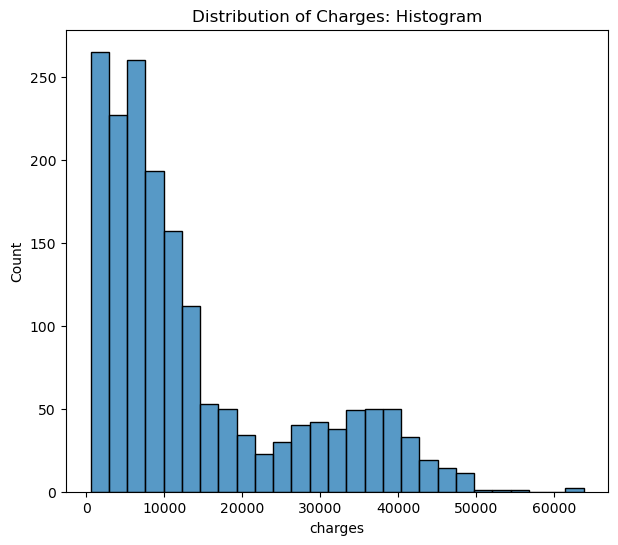

In [143]:
plt.figure(figsize=(7,6))
sns.histplot(data['charges'])
plt.title('Distribution of Charges: Histogram');

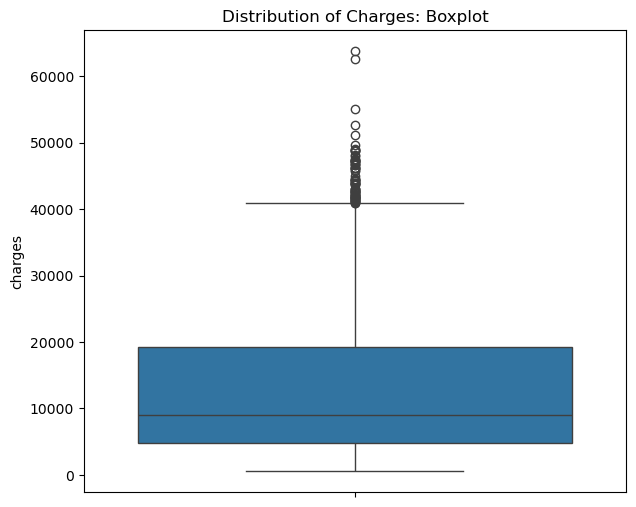

In [153]:
plt.figure(figsize=(7,6))
sns.boxplot(data['charges'])
plt.title('Distribution of Charges: Boxplot');

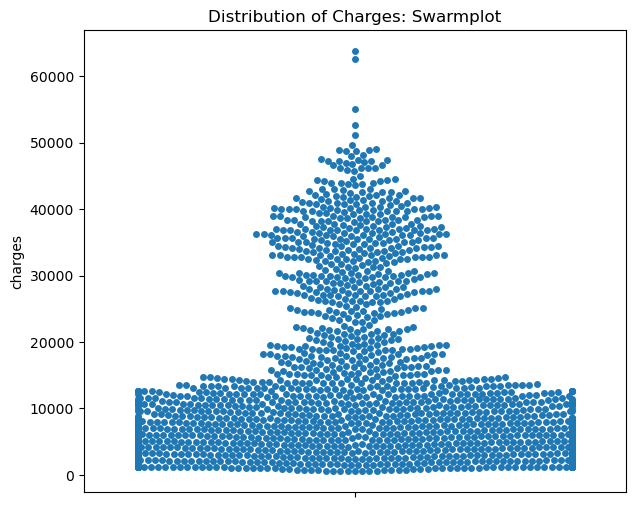

In [155]:
plt.figure(figsize=(7,6))
sns.swarmplot(data['charges'])
plt.title('Distribution of Charges: Swarmplot');

### 10. State how the distribution is different across gender and tiers of hospitals

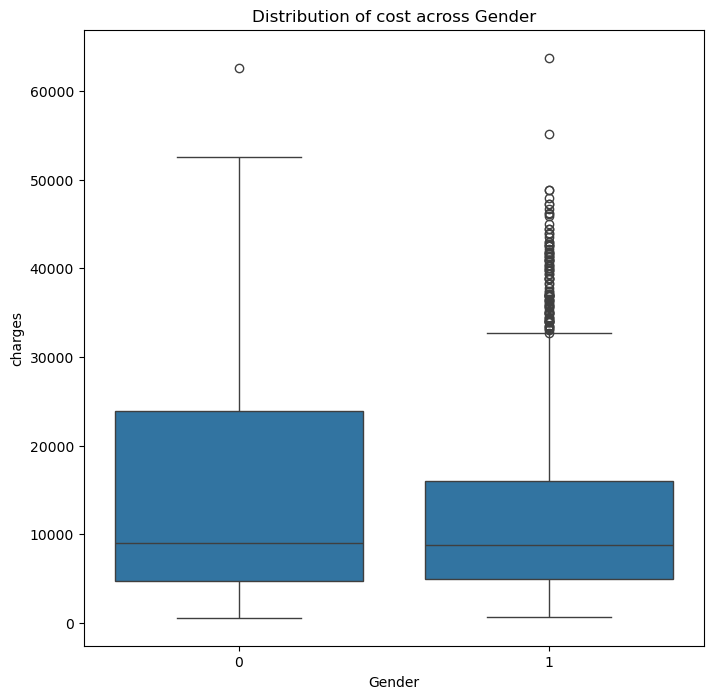

In [161]:
plt.figure(figsize=(8,8))
sns.boxplot(x = 'Gender', y = 'charges',data = data)
plt.title('Distribution of cost across Gender');

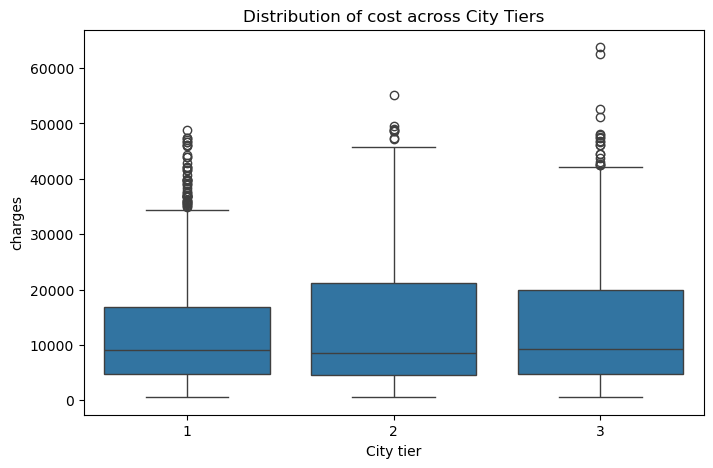

In [167]:
plt.figure(figsize=(8,5))
sns.boxplot(x = 'City tier', y = 'charges',data = data)
plt.title('Distribution of cost across City Tiers');

### 11. Create a radar chart to showcase the median hospitalization cost for each tier of hospitals

In [170]:
len('City tier')

9

In [174]:
from math import pi  # Ensure pi is imported

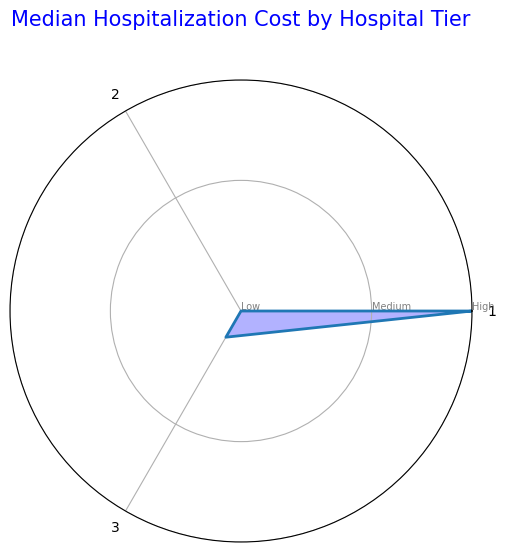

In [181]:
# Calculate the median charges for each hospital tier
median_charges = data.groupby('Hospital tier')['charges'].median()

# Prepare the radar chart data
tiers = list(median_charges.index)
medians = list(median_charges.values)

# Number of variables we're plotting (number of tiers)
num_vars = len(tiers)

# Create a list of angles for the radar chart, equally spaced around a circle
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Close the loop

# Add the first median to the end to close the loop on the radar chart
medians += medians[:1]

# Create the radar chart
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)

# Draw one axis per variable and add labels
plt.xticks(angles[:-1], tiers)

# Draw y-labels (the medians)
ax.set_rlabel_position(0)
plt.yticks([min(medians), np.median(medians), max(medians)], ["Low", "Medium", "High"], color="grey", size=7)
plt.ylim(min(medians), max(medians))

# Plot the data on the radar chart
ax.plot(angles, medians, linewidth=2, linestyle='solid')

# Fill the area inside the plot
ax.fill(angles, medians, 'b', alpha=0.3)

# Title of the radar chart
plt.title('Median Hospitalization Cost by Hospital Tier', size=15, color='blue', y=1.1)

# Show the radar chart
plt.show()


### 12. Create a frequency table and a stacked bar chart to visualize the count of people in the different tiers of cities and hospitals

Hospital tier   1    2    3
City tier                  
1              64  317  160
2              89  365  157
3              91  348  164


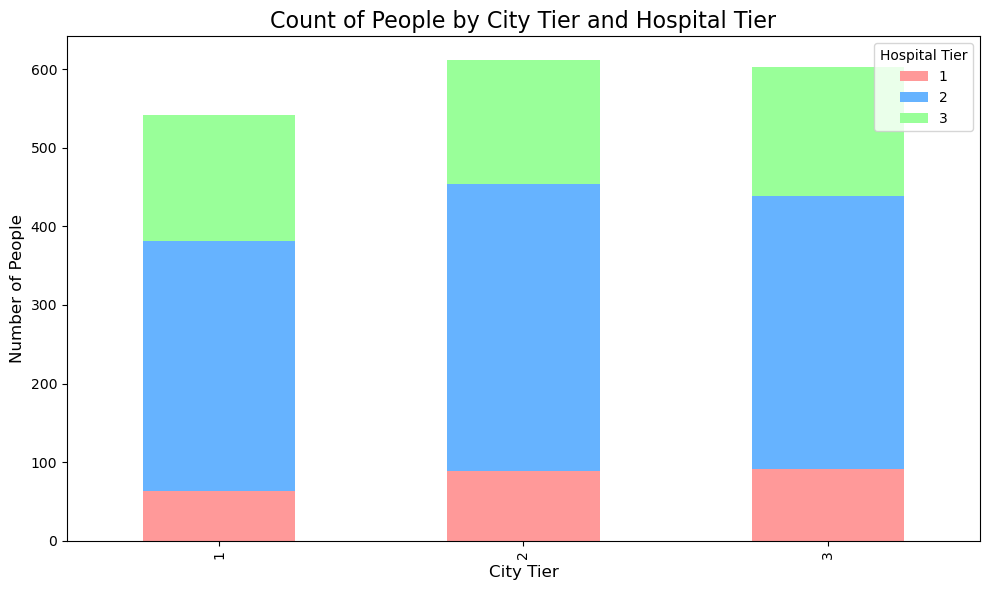

In [189]:
# Step 1: Create a frequency table
frequency_table = pd.crosstab(data['City tier'], data['Hospital tier'])

# Display the frequency table
print(frequency_table)

# Step 2: Create a stacked bar chart
# Plot the frequency table as a stacked bar chart
frequency_table.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#FF9999', '#66B3FF', '#99FF99'])

# Add chart title and labels
plt.title('Count of People by City Tier and Hospital Tier', fontsize=16)
plt.xlabel('City Tier', fontsize=12)
plt.ylabel('Number of People', fontsize=12)

# Display the legend
plt.legend(title='Hospital Tier')

# Show the plot
plt.tight_layout()
plt.show()
